In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier

In [2]:
# helper function to plot curves
def make_plot(metric_values, train_values, cv_values, model_name, metric_name, score_name, curve_type):
    
    fig = plt.figure()
    ax = plt.gca()
    ax.plot(metric_values, train_values, label='Training score')
    ax.plot(metric_values, cv_values, label='CV score')
    ax.set_xlabel(metric_name)
    ax.set_ylabel(score_name)
    title = '{} curve for {} ({})'.format(curve_type, model_name, score_name)
    ax.set_title(title)
    ax.legend()
    
def plot_curve(model, model_name, X, y, param_name, scoring, curve_type, param_range=None):
    
    if curve_type == 'Validation':
        train_scores, cv_scores = validation_curve(model, X, y,
                                                   param_name=param_name, 
                                                   param_range=param_range, 
                                                   scoring=scoring,
                                                   cv=5,
                                                   n_jobs=-1)
    elif curve_type == 'Learning':
        train_sizes, train_scores, cv_scores = learning_curve(model, X, y,
                                                              train_sizes=np.linspace(.1, 1.0, 100),
                                                              scoring=scoring,
                                                              cv=5,
                                                              n_jobs=-1)
        param_range = train_sizes
        
    train_score_means = np.mean(train_scores, axis=1)
    cv_score_means = np.mean(cv_scores, axis=1)
    
    make_plot(metric_values=param_range,
              train_values=train_score_means,
              cv_values = cv_score_means,
              model_name=model_name, 
              metric_name=param_name.capitalize().replace('_',' '),
              score_name=scoring.capitalize(),
              curve_type=curve_type
             )

## Red & White Wine Dataset

In [3]:
df_white = pd.read_csv('winequality-white.csv', sep=';')
df_red = pd.read_csv('winequality-red.csv', sep=';')

df_white['type'] = ['white'] * len(df_white)
df_red['type'] = ['red'] * len(df_red)

df = pd.concat([df_white, df_red])

X = df.drop(['quality', 'type'], axis=1) 
y = df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=2020) 

# In data_exploration we see almost all features have a normal distribution 
# So it makes sense to use StandardScaler
scaler = StandardScaler()
encoder = LabelEncoder() 

# Apply the scaler on train and test data separately
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns) 
y_train = encoder.fit_transform(y_train)

X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns) 
y_test = encoder.fit_transform(y_test)

**Train default classifier with k=5.**

In [4]:
clf = KNeighborsClassifier()

**Analyze how the number of neighbors affects predictions.**

CPU times: user 370 ms, sys: 79.7 ms, total: 449 ms
Wall time: 35.3 s


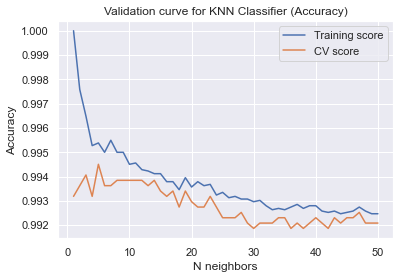

In [5]:
%%time
n_neighbors = list(range(1,51))
plot_curve(model=clf,
           model_name='KNN Classifier', 
           X=X_train, 
           y=y_train, 
           param_name='n_neighbors', 
           param_range=n_neighbors, 
           scoring='accuracy', 
           curve_type='Validation')

**Narrow down the range.**

CPU times: user 77.6 ms, sys: 9.44 ms, total: 87.1 ms
Wall time: 5.42 s


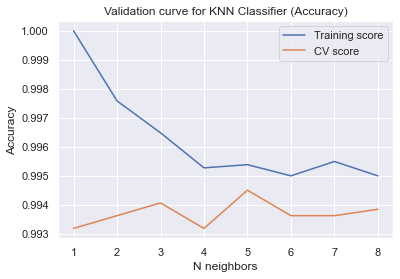

In [6]:
%%time
n_neighbors = list(range(1,9))
plot_curve(model=clf,
           model_name='KNN Classifier', 
           X=X_train, 
           y=y_train, 
           param_name='n_neighbors', 
           param_range=n_neighbors, 
           scoring='accuracy', 
           curve_type='Validation')

**Select 5 as the explicit number of neighbors and train the model.**

In [7]:
clf = KNeighborsClassifier(n_neighbors=5)

In [8]:
%%time
clf.fit(X_train, y_train)

CPU times: user 5.72 ms, sys: 1.55 ms, total: 7.27 ms
Wall time: 6.57 ms


KNeighborsClassifier()

**Look at the learning rate.**

CPU times: user 669 ms, sys: 80.1 ms, total: 749 ms
Wall time: 40.7 s


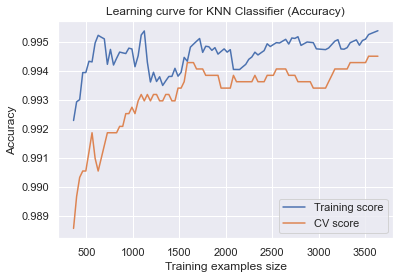

In [9]:
%%time
plot_curve(model=clf,
           model_name='KNN Classifier', 
           X=X_train, 
           y=y_train, 
           param_name='Training examples size', 
           scoring='accuracy', 
           curve_type='Learning')

**Check results for the test data.**

In [10]:
%%time
y_predicted = clf.predict(X_test)

CPU times: user 132 ms, sys: 2.6 ms, total: 135 ms
Wall time: 136 ms


In [11]:
print(classification_report(y_test, y_predicted, digits=4))

              precision    recall  f1-score   support

           0     0.9896    0.9735    0.9815       491
           1     0.9911    0.9966    0.9938      1459

    accuracy                         0.9908      1950
   macro avg     0.9904    0.9850    0.9877      1950
weighted avg     0.9908    0.9908    0.9907      1950



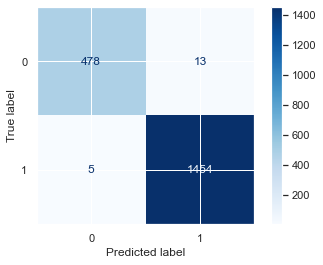

In [12]:
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, display_labels=[0,1]);

## Shill Bidding Dataset

In [13]:
df = pd.read_csv("Shill Bidding Dataset.csv")

X = df.drop(['Record_ID', 'Auction_ID', 'Bidder_ID', 'Class'], axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=2020) 

# Use MinMaxScaler because data has outliers, and we want to highlight those
scaler = MinMaxScaler() 

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns) 
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns) 

**Train default classifier with k=5.**

In [14]:
clf = KNeighborsClassifier()

**Analyze how the number of neighbors affects predictions.**

CPU times: user 499 ms, sys: 52.4 ms, total: 552 ms
Wall time: 33.6 s


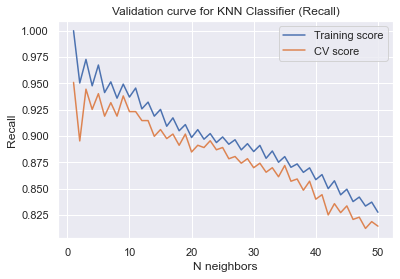

In [15]:
%%time
n_neighbors = list(range(1,51))
plot_curve(model=clf,
           model_name='KNN Classifier', 
           X=X_train, 
           y=y_train, 
           param_name='n_neighbors', 
           param_range=n_neighbors, 
           scoring='recall', 
           curve_type='Validation')

**Narrow down the range.**

CPU times: user 63.2 ms, sys: 6.34 ms, total: 69.5 ms
Wall time: 2.47 s


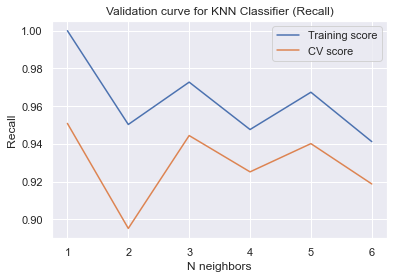

In [16]:
%%time
n_neighbors = list(range(1,7))
plot_curve(model=clf,
           model_name='KNN Classifier', 
           X=X_train, 
           y=y_train, 
           param_name='n_neighbors', 
           param_range=n_neighbors, 
           scoring='recall', 
           curve_type='Validation')

**Check the kearning rate for different values of k: 1, 3, 5 to see if results differ.**

In [17]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

CPU times: user 772 ms, sys: 90.1 ms, total: 862 ms
Wall time: 37.5 s


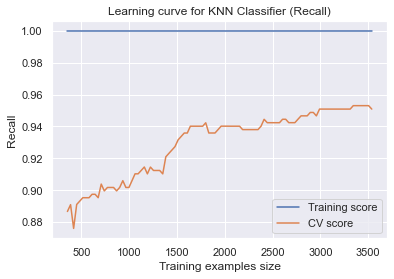

In [18]:
%%time
plot_curve(model=clf,
           model_name='KNN Classifier', 
           X=X_train, 
           y=y_train, 
           param_name='Training examples size', 
           scoring='recall', 
           curve_type='Learning')

In [19]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

CPU times: user 719 ms, sys: 81.7 ms, total: 801 ms
Wall time: 28.2 s


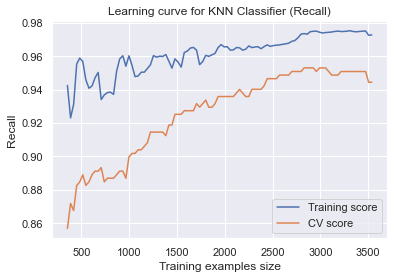

In [20]:
%%time
plot_curve(model=clf,
           model_name='KNN Classifier', 
           X=X_train, 
           y=y_train, 
           param_name='Training examples size', 
           scoring='recall', 
           curve_type='Learning')

In [21]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier()

CPU times: user 711 ms, sys: 80 ms, total: 792 ms
Wall time: 27.5 s


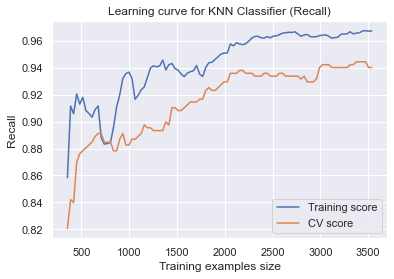

In [22]:
%%time
plot_curve(model=clf,
           model_name='KNN Classifier', 
           X=X_train, 
           y=y_train, 
           param_name='Training examples size', 
           scoring='recall', 
           curve_type='Learning')

**Look like k=5 performs the best, so we will use this value on test data.**

In [23]:
clf = KNeighborsClassifier(n_neighbors=5)

In [24]:
%%time
clf.fit(X_train, y_train)

CPU times: user 9.49 ms, sys: 849 µs, total: 10.3 ms
Wall time: 11.3 ms


KNeighborsClassifier()

In [25]:
%%time
y_predicted = clf.predict(X_test)

CPU times: user 96.6 ms, sys: 2.96 ms, total: 99.6 ms
Wall time: 102 ms


In [26]:
print(classification_report(y_test, y_predicted, digits=4))

              precision    recall  f1-score   support

           0     0.9953    0.9947    0.9950      1690
           1     0.9567    0.9614    0.9590       207

    accuracy                         0.9910      1897
   macro avg     0.9760    0.9780    0.9770      1897
weighted avg     0.9911    0.9910    0.9910      1897



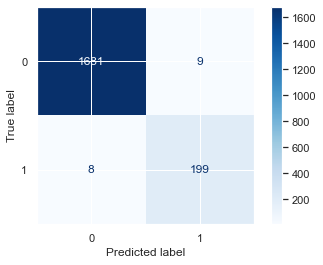

In [27]:
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, display_labels=[0,1]);